### РЕГРЕССИЯ

Оригинальный датасет: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Модели для обучения регрессии: 
* линейная регрессия
* логистическая регрессия
* дерево решений
* случайный лес
* градиентный бустинг

Файлы:
* test.csv - тестовые данные
* train.csv - тренировочные данные
* sample_submission.csv - цена для тестовых данных (с чем сверяемся)
* data_description.txt - описание признаков из таблиц

Описания колонок будет в отдельном словаре с переводом на русский

In [1]:
column_descriptions = {
    "SalePrice": "Цена продажи недвижимости в долларах (целевая переменная)",
    "MSSubClass": "Класс здания",
    "MSZoning": "Общая классификация зонирования",
    "LotFrontage": "Фасад участка (футов улицы, прилегающих к собственности)",
    "LotArea": "Площадь участка (в квадратных футах)",
    "Street": "Тип дорожного доступа",
    "Alley": "Тип доступа к переулку",
    "LotShape": "Общая форма участка",
    "LandContour": "Рельеф участка (насколько он ровный)",
    "Utilities": "Доступные коммунальные услуги",
    "LotConfig": "Конфигурация участка",
    "LandSlope": "Наклон участка",
    "Neighborhood": "Район (местоположение в пределах города Ames)",
    "Condition1": "Близость к главной дороге или железной дороге",
    "Condition2": "Близость ко второй главной дороге или железной дороге (если есть)",
    "BldgType": "Тип здания",
    "HouseStyle": "Стиль дома",
    "OverallQual": "Общая оценка качества материалов и отделки",
    "OverallCond": "Общая оценка состояния дома",
    "YearBuilt": "Год постройки",
    "YearRemodAdd": "Год реконструкции или добавления пристройки",
    "RoofStyle": "Тип крыши",
    "RoofMatl": "Материал крыши",
    "Exterior1st": "Внешняя отделка дома (первичный материал)",
    "Exterior2nd": "Внешняя отделка дома (вторичный материал, если есть)",
    "MasVnrType": "Тип каменной облицовки",
    "MasVnrArea": "Площадь каменной облицовки (в квадратных футах)",
    "ExterQual": "Качество внешней отделки",
    "ExterCond": "Текущее состояние внешней отделки",
    "Foundation": "Тип фундамента",
    "BsmtQual": "Высота потолков в подвале",
    "BsmtCond": "Общее состояние подвала",
    "BsmtExposure": "Наличие окон или выхода из подвала",
    "BsmtFinType1": "Качество отделки первой зоны подвала",
    "BsmtFinSF1": "Площадь первой зоны отделанного подвала",
    "BsmtFinType2": "Качество отделки второй зоны подвала (если есть)",
    "BsmtFinSF2": "Площадь второй зоны отделанного подвала",
    "BsmtUnfSF": "Площадь неотделанного подвала",
    "TotalBsmtSF": "Общая площадь подвала",
    "Heating": "Тип отопления",
    "HeatingQC": "Качество и состояние системы отопления",
    "CentralAir": "Наличие центрального кондиционирования",
    "Electrical": "Тип электропроводки",
    "1stFlrSF": "Площадь первого этажа",
    "2ndFlrSF": "Площадь второго этажа",
    "LowQualFinSF": "Площадь низкокачественной отделки (на всех этажах)",
    "GrLivArea": "Площадь жилых помещений над землей",
    "BsmtFullBath": "Количество полноценных ванных комнат в подвале",
    "BsmtHalfBath": "Количество половинных ванных комнат в подвале",
    "FullBath": "Количество полноценных ванных комнат выше подвала",
    "HalfBath": "Количество половинных ванных комнат выше подвала",
    "Bedroom": "Количество спален (выше уровня подвала)",
    "Kitchen": "Количество кухонь",
    "KitchenQual": "Качество кухни",
    "TotRmsAbvGrd": "Общее количество комнат выше уровня земли (без учета ванных комнат)",
    "Functional": "Функциональность дома (способность выполнять свою функцию)",
    "Fireplaces": "Количество каминов",
    "FireplaceQu": "Качество камина",
    "GarageType": "Тип гаража (расположение)",
    "GarageYrBlt": "Год постройки гаража",
    "GarageFinish": "Внутренняя отделка гаража",
    "GarageCars": "Вместимость гаража (в автомобилях)",
    "GarageArea": "Площадь гаража (в квадратных футах)",
    "GarageQual": "Качество гаража",
    "GarageCond": "Состояние гаража",
    "PavedDrive": "Асфальтированный подъезд",
    "WoodDeckSF": "Площадь деревянной террасы",
    "OpenPorchSF": "Площадь открытой веранды",
    "EnclosedPorch": "Площадь закрытой веранды",
    "3SsnPorch": "Площадь трехсезонной веранды",
    "ScreenPorch": "Площадь веранды с москитной сеткой",
    "PoolArea": "Площадь бассейна",
    "PoolQC": "Качество бассейна",
    "Fence": "Качество забора",
    "MiscFeature": "Дополнительные особенности дома (не включенные в другие категории)",
    "MiscVal": "Денежная стоимость дополнительных особенностей",
    "MoSold": "Месяц продажи",
    "YrSold": "Год продажи",
    "SaleType": "Тип продажи",
    "SaleCondition": "Условия продажи"
}


#### 1. Обработка данных

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
test_data = pd.read_csv(r'C:\pet projects\pet-projects\houseprice\data\train.csv')
test_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
missing_cols = test_data.isna().sum()
missing_cols_name = missing_cols[missing_cols > 0].index
missing_info_df = pd.DataFrame({
    "missing_count": missing_cols[missing_cols > 0],
    "description": [column_descriptions[col] for col in missing_cols_name],
    "types": [test_data[col].dtype for col in missing_cols_name]
})
missing_info_df

,missing_count,description,types
LotFrontage,259,"Фасад участка (футов улицы, прилегающих к собс...",float64
Alley,1369,Тип доступа к переулку,object
MasVnrType,872,Тип каменной облицовки,object
MasVnrArea,8,Площадь каменной облицовки (в квадратных футах),float64
BsmtQual,37,Высота потолков в подвале,object
BsmtCond,37,Общее состояние подвала,object
BsmtExposure,38,Наличие окон или выхода из подвала,object
BsmtFinType1,37,Качество отделки первой зоны подвала,object
BsmtFinType2,38,Качество отделки второй зоны подвала (если есть),object
Electrical,1,Тип электропроводки,object


Начнём работать с пропущенными значениями

In [7]:
test_data.LotFrontage.replace(np.nan, 0, inplace=True)
test_data.GarageYrBlt.replace(np.nan, 0, inplace=True)
test_data.MasVnrArea.replace(np.nan, 0, inplace=True)

In [8]:
test_data = test_data.dropna(subset=['Electrical'])

cols_with_missing = test_data.columns[(test_data.isna().sum() < 100) & (test_data.isna().sum() > 0)]

test_data = test_data.dropna(subset=cols_with_missing)

In [9]:
test_data = test_data.drop(columns=['MiscFeature'])

In [10]:
missing_cols = test_data.isna().sum()
missing_cols_name = missing_cols[missing_cols > 0].index
missing_info_df = pd.DataFrame({
    "missing_count": missing_cols[missing_cols > 0],
    "description": [column_descriptions[col] for col in missing_cols_name],
    "types": [test_data[col].dtype for col in missing_cols_name]
})
missing_info_df

,missing_count,description,types
Alley,1264,Тип доступа к переулку,object
MasVnrType,771,Тип каменной облицовки,object
FireplaceQu,595,Качество камина,object
PoolQC,1339,Качество бассейна,object
Fence,1085,Качество забора,object


In [11]:
test_data['Alley'].fillna('Not Allowed', inplace=True)

Оставим NaN значения, поскольку большую часть занимают из тестового датасета

#### 2. Определение признаков

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1346 non-null   int64  
 1   MSSubClass     1346 non-null   int64  
 2   MSZoning       1346 non-null   object 
 3   LotFrontage    1346 non-null   float64
 4   LotArea        1346 non-null   int64  
 5   Street         1346 non-null   object 
 6   Alley          1346 non-null   object 
 7   LotShape       1346 non-null   object 
 8   LandContour    1346 non-null   object 
 9   Utilities      1346 non-null   object 
 10  LotConfig      1346 non-null   object 
 11  LandSlope      1346 non-null   object 
 12  Neighborhood   1346 non-null   object 
 13  Condition1     1346 non-null   object 
 14  Condition2     1346 non-null   object 
 15  BldgType       1346 non-null   object 
 16  HouseStyle     1346 non-null   object 
 17  OverallQual    1346 non-null   int64  
 18  OverallCond  

Построим матрицу корреляции c количественными значениями и посмотрим на взаимодействие с SalePrice

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Тепловая карта матрицы корреляции взаимодействия с SalePrice')

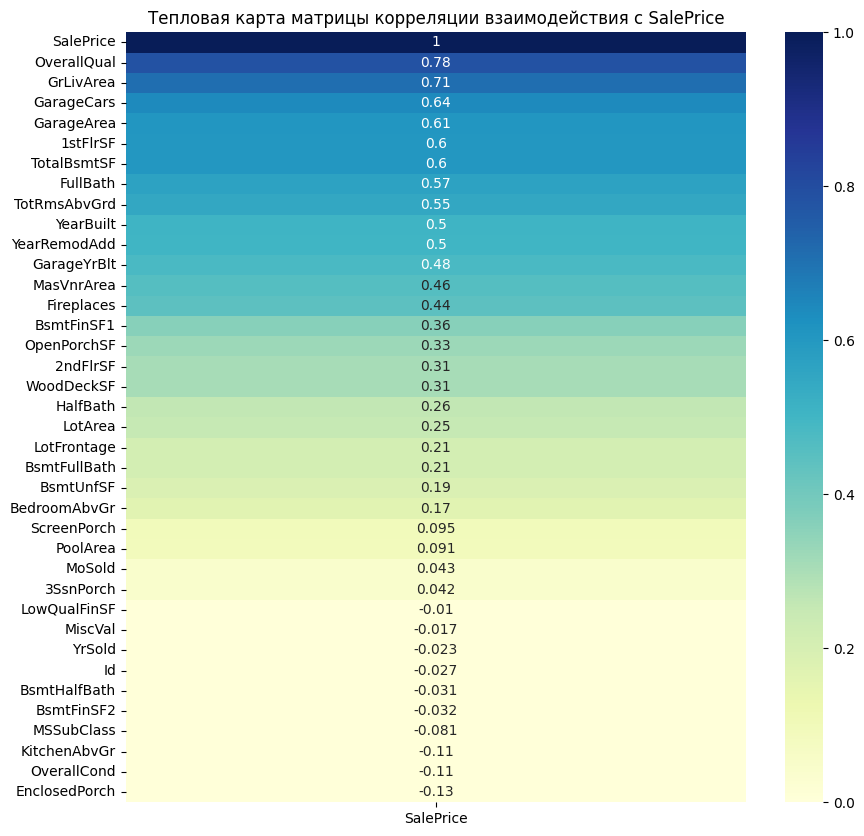

In [14]:
corr_saleprice = test_data.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.heatmap(corr_saleprice.to_frame(), annot=True, cmap="YlGnBu", vmin=0, vmax=1)
plt.title("Тепловая карта матрицы корреляции взаимодействия с SalePrice")

Пусть наше порового значение будет 0.2 => отбросим столбцы, у которых значений корреляции меньше 0.2

In [15]:
low_corr_columns = corr_saleprice[corr_saleprice < 0.2].index.tolist()
test_data.drop(low_corr_columns, axis=1, inplace=True)

Проанализируем распределение данных по каждой категориальной переменной с помощью многофакторного ANOVA

Сначала уберем те признаки, в которых распределение данных неравномерно

In [16]:
category_columns = test_data.select_dtypes(include='object')

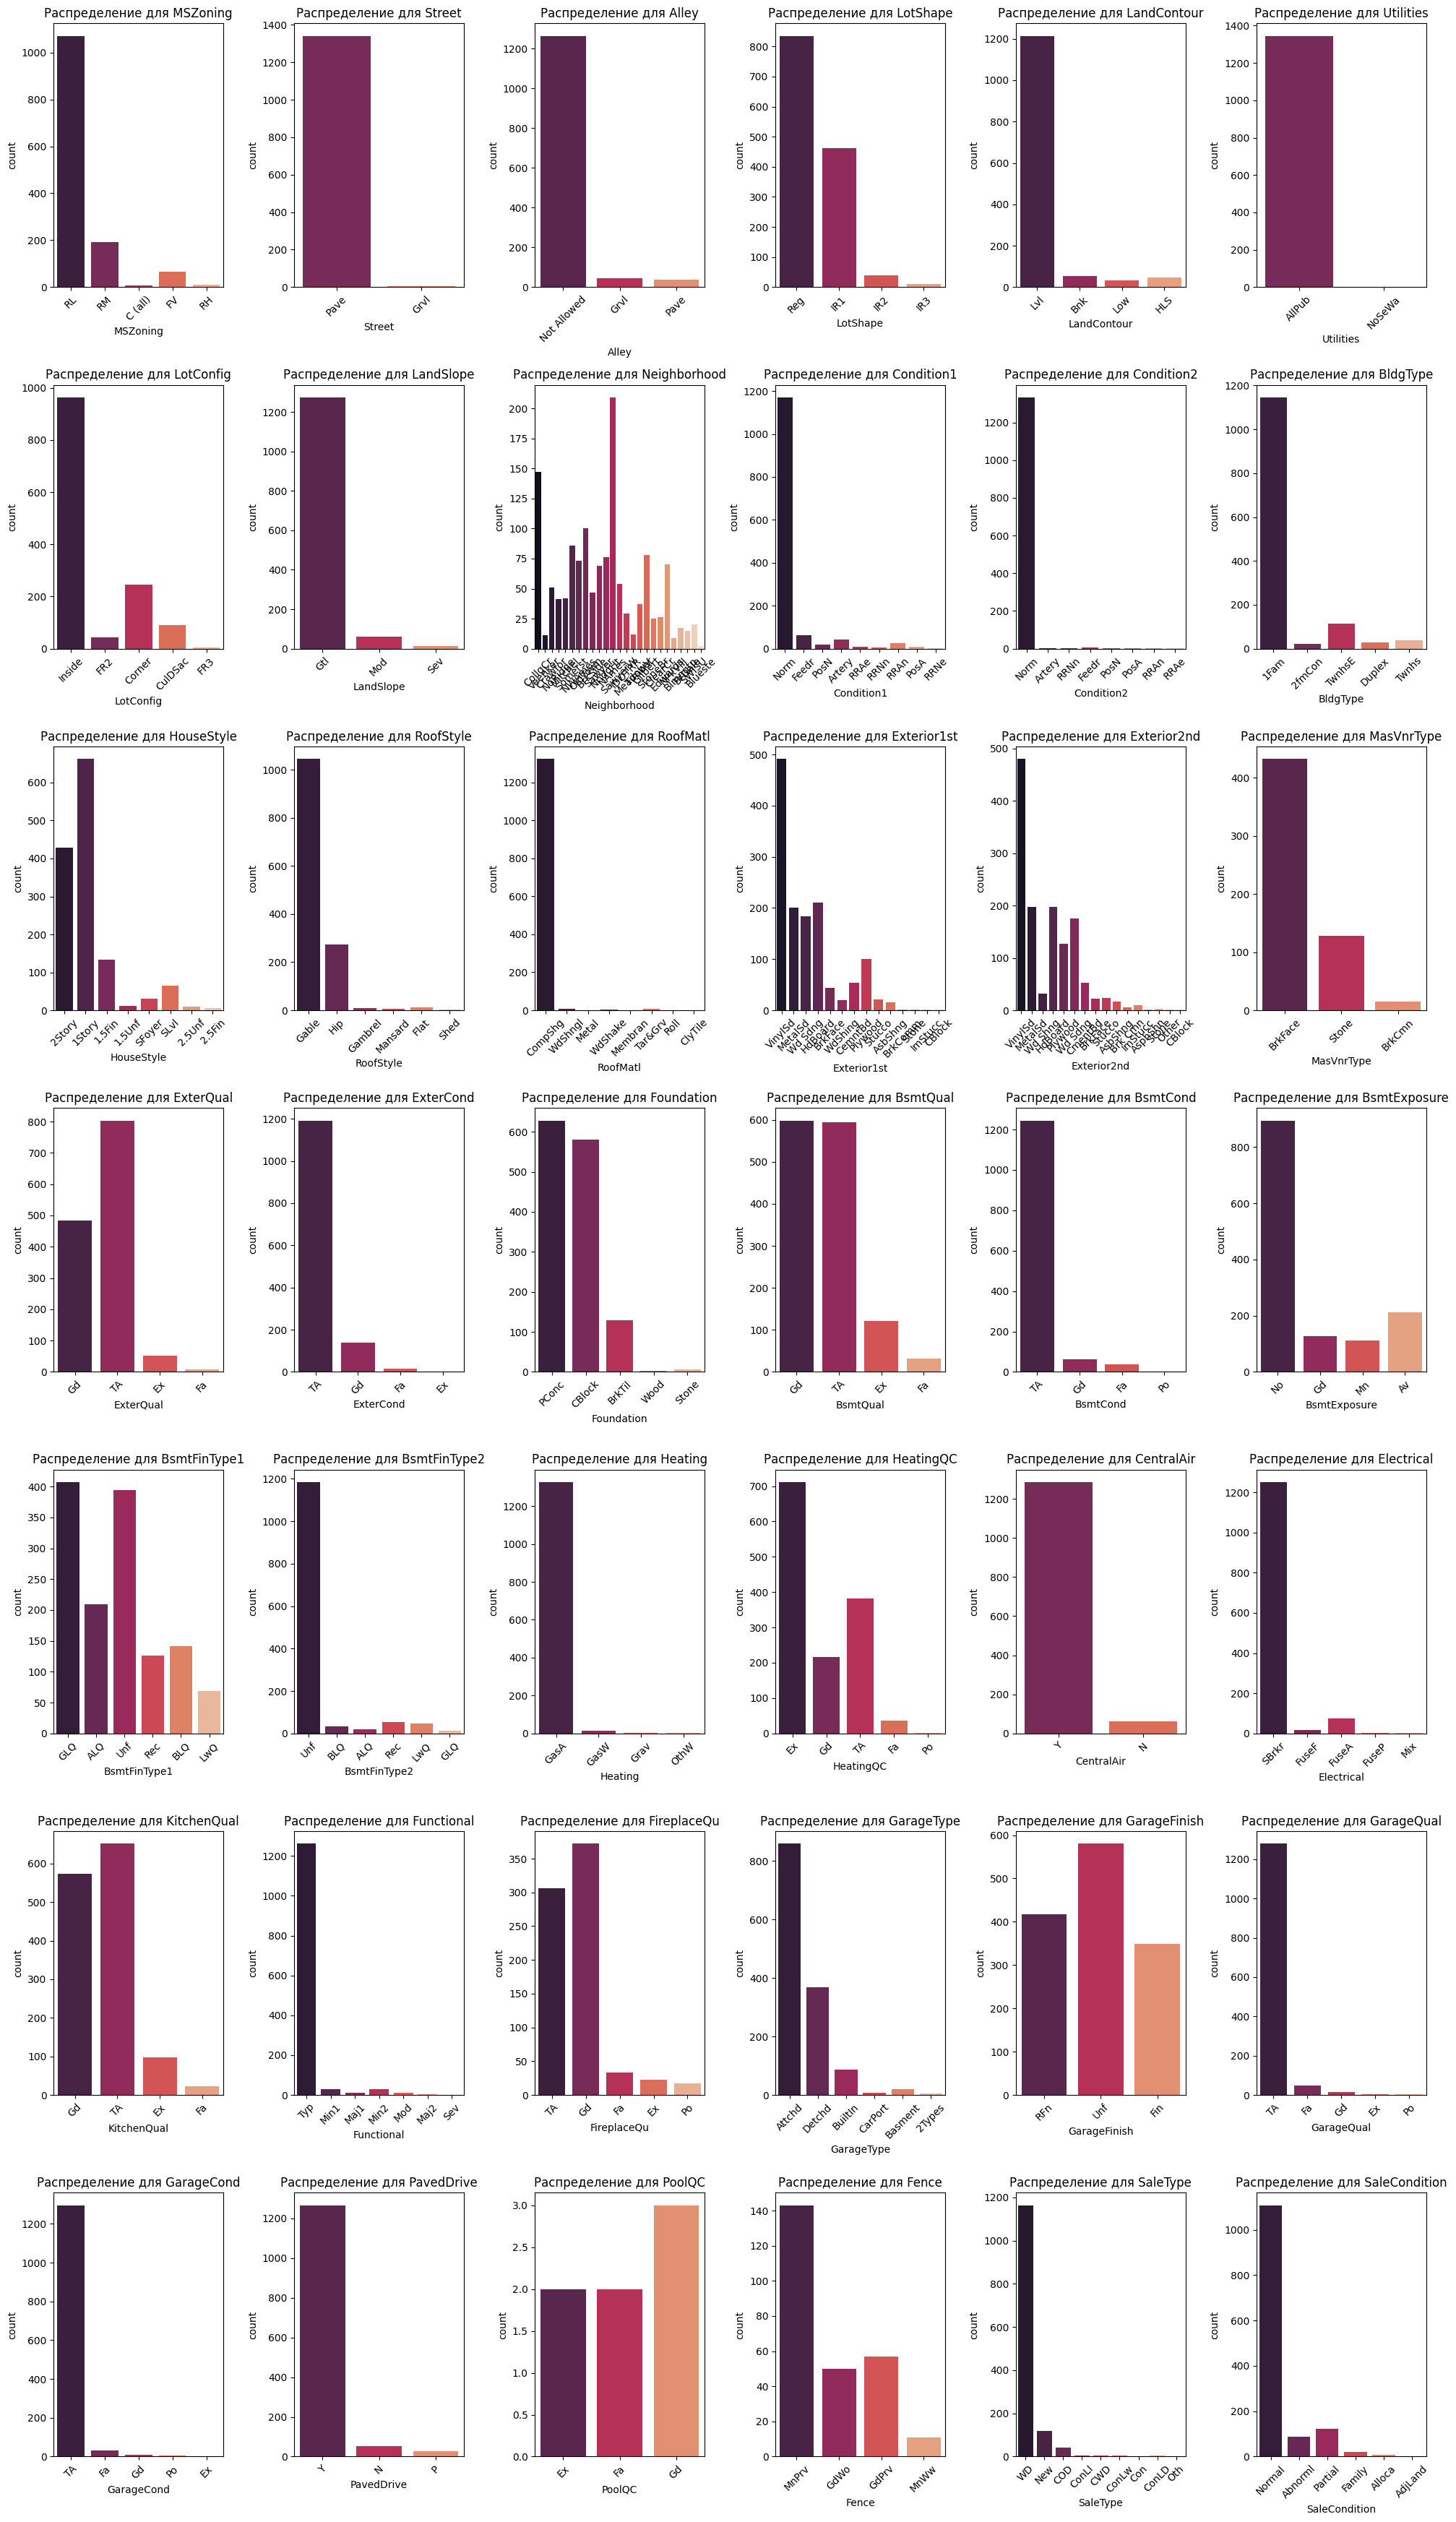

In [17]:
category_columns = test_data.select_dtypes(include='object')

n_cols = 6  
n_rows = (len(category_columns.columns) // n_cols) + (1 if len(category_columns.columns) % n_cols else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

axes = axes.flatten()

for i, col in enumerate(category_columns.columns):
    sns.countplot(data=test_data, x=col, ax=axes[i], palette='rocket', hue=col, legend=False)
    axes[i].set_title(f'Распределение для {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

По гистограммам видно, какие можно отбросить категориальные признаки по тому, как распределены данные - если практически все в одной группе из категории - не берём этот признак

Признаки: 
Street, Utilities, Condition2, RoofMatl, Heating, GarageCond

In [18]:
test_data.drop(columns=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'GarageCond'], inplace=True)
category_columns = test_data.select_dtypes(include='object')

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Отдельно ANOVA для каждого категориального признака с переменной

In [20]:
import numpy as np
from scipy import stats

cat_features = test_data.select_dtypes(include=['object', 'category']).columns
target = 'SalePrice'

anova_results = {}

for feature in cat_features:
    groups = [test_data[test_data[feature] == cat][target] for cat in test_data[feature].dropna().unique()]
    
    if len(groups) > 1:  
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[feature] = {'F-stat': f_stat, 'p-value': p_value}

significant_features = {k: v for k, v in anova_results.items() if v['p-value'] < 0.05}
sorted_features = sorted(significant_features.items(), key=lambda x: x[1]['F-stat'], reverse=True)

print("Значимые категориальные признаки:")
for feature, values in sorted_features:
    print(f"{feature}: F = {np.round(values['F-stat'], 1)}, p = {np.round(values['p-value'], 5)}")


Значимые категориальные признаки:
ExterQual: F = 385.2, p = 0.0
BsmtQual: F = 371.3, p = 0.0
KitchenQual: F = 363.8, p = 0.0
GarageFinish: F = 238.5, p = 0.0
Foundation: F = 105.3, p = 0.0
HeatingQC: F = 76.8, p = 0.0
BsmtExposure: F = 71.6, p = 0.0
GarageType: F = 67.1, p = 0.0
BsmtFinType1: F = 64.9, p = 0.0
Neighborhood: F = 61.6, p = 0.0
CentralAir: F = 55.8, p = 0.0
SaleCondition: F = 40.8, p = 0.0
MSZoning: F = 38.9, p = 0.0
LotShape: F = 34.6, p = 0.0
MasVnrType: F = 29.2, p = 0.0
SaleType: F = 26.8, p = 0.0
FireplaceQu: F = 23.7, p = 0.0
PavedDrive: F = 23.0, p = 0.0
Exterior1st: F = 19.6, p = 0.0
Exterior2nd: F = 17.2, p = 0.0
Electrical: F = 16.8, p = 0.0
HouseStyle: F = 16.7, p = 0.0
RoofStyle: F = 16.6, p = 0.0
Alley: F = 14.7, p = 0.0
LandContour: F = 12.6, p = 0.0
BsmtCond: F = 11.7, p = 0.0
GarageQual: F = 9.9, p = 0.0
BldgType: F = 8.8, p = 0.0
LotConfig: F = 6.7, p = 3e-05
ExterCond: F = 6.6, p = 0.0002
Condition1: F = 5.1, p = 0.0
Fence: F = 4.1, p = 0.00756
BsmtFinTy

Среди них самые значимые: 
* ExterQual: F = 385.2, p = 0.0
* BsmtQual: F = 371.3, p = 0.0
* KitchenQual: F = 363.8, p = 0.0
* GarageFinish: F = 238.5, p = 0.0
* Foundation: F = 105.3, p = 0.0
* FireplaceQu: F = 101.2, p = 0.0
* MasVnrType: F = 88.7, p = 0.0
* HeatingQC: F = 76.8, p = 0.0
* BsmtExposure: F = 71.6, p = 0.0
* GarageType: F = 67.1, p = 0.0

Видно, что у каждого категориального признака p-value < 0.05 => мы не можем отбросить их


Посмотрим через критерий Крускала-Уоллиса

In [21]:
from scipy.stats import kruskal

kruskal_results = []

for feature in cat_features:
    groups = [test_data[test_data[feature] == cat]['SalePrice'] for cat in test_data[feature].unique()]
    
    if len(groups) > 1:
        h_stat, p_value = kruskal(*groups)
        kruskal_results.append((feature, h_stat, p_value))

kruskal_df = pd.DataFrame(kruskal_results, columns=['Feature', 'H-statistic', 'p-value'])

significant_features = kruskal_df[kruskal_df['p-value'] < 0.05].sort_values(by='H-statistic', ascending=False)

print("Значимые признаки (Краскела-Уоллиса):")
print(significant_features)

Значимые признаки (Краскела-Уоллиса):
          Feature  H-statistic        p-value
6    Neighborhood   782.426984  1.061424e-149
14      ExterQual   619.266055  6.709081e-134
17       BsmtQual   610.521767  5.276951e-132
25    KitchenQual   599.792733  1.117702e-129
29   GarageFinish   486.191443  2.659926e-106
16     Foundation   432.412455   2.752332e-92
28     GarageType   399.022166   4.819622e-84
22      HeatingQC   325.153731   4.050292e-69
20   BsmtFinType1   295.745050   8.229459e-62
11    Exterior1st   295.364883   2.242778e-55
12    Exterior2nd   284.711395   8.330214e-52
0        MSZoning   251.617428   2.918225e-53
9      HouseStyle   163.954083   4.718029e-32
35  SaleCondition   152.102257   4.764028e-31
34       SaleType   150.232542   1.753582e-28
19   BsmtExposure   141.271281   2.010668e-30
2        LotShape   134.692326   5.269066e-29
24     Electrical    98.748351   1.816670e-20
23     CentralAir    84.501412   3.839406e-20
7      Condition1    66.358157   2.598811e

Среди них самые значимые: 
* ExterQual   619.266055  6.709081e-134
* BsmtQual   610.521767  5.276951e-132
* KitchenQual   599.792733  1.117702e-129
* GarageFinish   486.191443  2.659926e-106
* Neighborhood   456.314804   9.394497e-92
* Foundation   432.412455   2.752332e-92
* GarageType   399.022166   4.819622e-84
* FireplaceQu   392.416699   1.278063e-82
* HeatingQC   325.153731   4.050292e-69
* BsmtFinType1   295.745050   8.229459e-62

В итоге оставим следующие значения: 
* ExterQual
* BsmtQual
* KitchenQual
* GarageFinish
* Foundation
* FireplaceQu
* MasVnrType
* HeatingQC
* BsmtExposure
* GarageType
* Neighborhood
* BsmtFinType1 

In [22]:
significant_columns = [
    'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish', 'Foundation',
    'FireplaceQu', 'MasVnrType', 'HeatingQC', 'BsmtExposure', 'GarageType',
    'Neighborhood', 'BsmtFinType1'
]

cat_features = test_data.select_dtypes(include=['object', 'category']).columns
non_significant_columns = [col for col in cat_features if col not in significant_columns]

test_data.drop(non_significant_columns, axis=1, inplace=True)

In [23]:
test_data.head()

,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,CollgCr,7,2003,2003,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,856,Ex,856,854,1710,1,2,1,Gd,8,0,NaN,Attchd,2003.0,RFn,2,548,0,61,208500
1,80.0,9600,Veenker,6,1976,1976,NaN,0.0,TA,CBlock,Gd,Gd,ALQ,978,1262,Ex,1262,0,1262,0,2,0,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,181500
2,68.0,11250,CollgCr,7,2001,2002,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,920,Ex,920,866,1786,1,2,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,223500
3,60.0,9550,Crawfor,7,1915,1970,NaN,0.0,TA,BrkTil,TA,No,ALQ,216,756,Gd,961,756,1717,1,1,0,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,140000
4,84.0,14260,NoRidge,8,2000,2000,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,1145,Ex,1145,1053,2198,1,2,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,250000


В итоге полученные признаки из датасета для обучения модели:

In [24]:
test_data.columns

Index(['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

#### 3. Обучение моделей

Продублируем модели для обучения: 
* линейная регрессия
* дерево решений
* случайный лес
* xgboost
* градиентный бустинг

Возьмём данные в соотношении 80/20 для обучения и теста на test.csv

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
y = test_data['SalePrice']
X = test_data.drop(['SalePrice'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Наши метрики для анализа работы моделей:
 *	Средняя квадратичная ошибка (англ. Mean Squared Error, MSE)
 *	Cредняя абсолютная ошибка (англ. Mean Absolute Error, MAE)
 *	Коэффициент детерминации
 *	Средняя абсолютная процентная ошибка (англ. Mean Absolute Percentage Error, MAPE)
 *	Корень из средней квадратичной ошибки (англ. Root Mean Squared Error, RMSE)
 *	Cимметричная MAPE (англ. Symmetric MAPE, SMAPE)
 *	Средняя абсолютная масштабированная ошибка (англ. Mean absolute scaled error, MASE)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def symmetric_mean_absolute_percentage_error(y_test, y_pred):
    return np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred))) * 100

def mean_absolute_scaled_error(y_test, y_pred):
    n = len(y_test)
    scale = np.mean(np.abs(np.diff(y_test)))
    return np.mean(np.abs(y_test - y_pred)) / scale

def root_mean_squared_error(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

##### 3.1 Линейная регрессия

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

X_train.replace('None', np.nan, inplace=True)
X_test.replace('None', np.nan, inplace=True)

X_train.fillna(X_train.mean(numeric_only=True), inplace=True)
X_test.fillna(X_train.mean(numeric_only=True), inplace=True)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [30]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1076 entries, 348 to 744
Data columns (total 94 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LotFrontage           1076 non-null   float64
 1   LotArea               1076 non-null   int64  
 2   OverallQual           1076 non-null   int64  
 3   YearBuilt             1076 non-null   int64  
 4   YearRemodAdd          1076 non-null   int64  
 5   MasVnrArea            1076 non-null   float64
 6   BsmtFinSF1            1076 non-null   int64  
 7   TotalBsmtSF           1076 non-null   int64  
 8   1stFlrSF              1076 non-null   int64  
 9   2ndFlrSF              1076 non-null   int64  
 10  GrLivArea             1076 non-null   int64  
 11  BsmtFullBath          1076 non-null   int64  
 12  FullBath              1076 non-null   int64  
 13  HalfBath              1076 non-null   int64  
 14  TotRmsAbvGrd          1076 non-null   int64  
 15  Fireplaces            107

In [31]:
lr_model = LinearRegression()
lr_model.fit(X_train_encoded, y_train)

y_pred = lr_model.predict(X_test_encoded)

In [32]:
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
mape_lr = mean_absolute_percentage_error(y_test, y_pred)
smape_lr = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_lr = mean_absolute_scaled_error(y_test, y_pred)
rmse_lr = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"R2 Score: {r2_lr}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lr}")
print(f"Symmetric MAPE (SMAPE): {smape_lr}")
print(f"Mean Absolute Scaled Error (MASE): {mase_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")


Mean Squared Error (MSE): 2058283132.2744706
Mean Absolute Error (MAE): 20141.380555154374
R2 Score: 0.6706416629476821
Mean Absolute Percentage Error (MAPE): 12.201779445846528
Symmetric MAPE (SMAPE): 10.721628474477027
Mean Absolute Scaled Error (MASE): 0.2558371842951314
Root Mean Squared Error (RMSE): 45368.30537142059


Mean Squared Error (MSE): 2363235499.78
Это достаточно большая ошибка, так как MSE чувствительна к большим отклонениям. Меньшее значение MSE указывает на лучшее качество модели.

Mean Absolute Error (MAE): 21789.1
Это означает, что в среднем ошибка модели составляет около 21,789 единиц. Если в вашем наборе данных это значительная величина, то это может быть приемлемо, но если ваши данные масштабируются к более мелким значениям, то это будет большой ошибкой.

R² Score: 0.62
Значение R² в 0.62 указывает на то, что модель объясняет 62% вариативности данных. Это довольно хорошее значение для большинства регрессионных задач, но все зависит от контекста. Чем ближе R² к 1, тем лучше модель объясняет данные.

Mean Absolute Percentage Error (MAPE): 13.28%
Это значение указывает, что средняя ошибка в процентах составляет около 13%. Для многих задач это хороший результат, но в зависимости от области, где требуется высокая точность, это может быть слишком большим.

Symmetric MAPE (SMAPE): 11.72%
SMAPE аналогична MAPE, но с учетом симметрии. Это значение также выглядит хорошим, так как оно немного меньше MAPE, что означает, что модель делает более сбалансированные ошибки в обоих направлениях (предсказанные и истинные значения).

Mean Absolute Scaled Error (MASE): 0.28
Это показатель того, насколько ваша модель эффективнее базового метода (например, просто использующего среднее значение). MASE меньше 1 обычно означает, что модель хорошая. В вашем случае 0.28 указывает на то, что модель работает значительно лучше базового метода.

Root Mean Squared Error (RMSE): 48613.12
Это еще один показатель ошибки, который выражается в тех же единицах, что и данные. Он похож на MSE, но более интерпретируем, так как не является квадратом величины. RMSE также достаточно велико, но сравнив это значение с масштабом ваших данных, можно сделать вывод о том, является ли это приемлемым.

###### 3.1.1 Полиномиальная регрессия

Здесь нужно преобразовать данные в полиномиальные

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
poly = PolynomialFeatures(degree=1)  
X_train_poly = poly.fit_transform(X_train_encoded)
X_test_poly = poly.transform(X_test_encoded)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred = poly_model.predict(X_test_poly)

In [35]:
mse_plr = mean_squared_error(y_test, y_pred)
mae_plr = mean_absolute_error(y_test, y_pred)
r2_plr = r2_score(y_test, y_pred)
mape_plr = mean_absolute_percentage_error(y_test, y_pred)
smape_plr = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_plr = mean_absolute_scaled_error(y_test, y_pred)
rmse_plr = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_plr}")
print(f"Mean Absolute Error (MAE): {mae_plr}")
print(f"R2 Score: {r2_plr}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_plr}")
print(f"Symmetric MAPE (SMAPE): {smape_plr}")
print(f"Mean Absolute Scaled Error (MASE): {mase_plr}")
print(f"Root Mean Squared Error (RMSE): {rmse_plr}")

Mean Squared Error (MSE): 2058283132.2742345
Mean Absolute Error (MAE): 20141.380555156356
R2 Score: 0.6706416629477199
Mean Absolute Percentage Error (MAPE): 12.201779445847484
Symmetric MAPE (SMAPE): 10.721628474478038
Mean Absolute Scaled Error (MASE): 0.2558371842951566
Root Mean Squared Error (RMSE): 45368.30537141799


Использование полиномиальной регрессии тоже ни к чему не привело (логично, ибо степень полинома= = 1 и если увеличить, резултат ухудшится)

###### 3.1.2 Регрессия с L1-регуляризацией (Lasso)

In [36]:
from sklearn.linear_model import Lasso

In [37]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_encoded, y_train)

y_pred = lasso_model.predict(X_test_encoded)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.022e+11, tolerance: 6.713e+08
  model = cd_fast.enet_coordinate_descent(


In [38]:
mse_lasso = mean_squared_error(y_test, y_pred)
mae_lasso = mean_absolute_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred)
smape_lasso = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_lasso = mean_absolute_scaled_error(y_test, y_pred)
rmse_lasso = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"Mean Absolute Error (MAE): {mae_lasso}")
print(f"R2 Score: {r2_lasso}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lasso}")
print(f"Symmetric MAPE (SMAPE): {smape_lasso}")
print(f"Mean Absolute Scaled Error (MASE): {mase_lasso}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso}")

Mean Squared Error (MSE): 2058174682.5683494
Mean Absolute Error (MAE): 20132.053753981992
R2 Score: 0.6706590166413027
Mean Absolute Percentage Error (MAPE): 12.193068561800231
Symmetric MAPE (SMAPE): 10.713514937963732
Mean Absolute Scaled Error (MASE): 0.25571871463294077
Root Mean Squared Error (RMSE): 45367.11014125045


Результаты чуть лучше

###### 3.1.3 Регрессия с L2-регуляризацией (Ridge)

In [39]:
from sklearn.linear_model import Ridge

In [40]:
ridge_model = Ridge(alpha=1.0)  # alpha можно настроить для регулировки силы регуляризации

ridge_model.fit(X_train_encoded, y_train)

y_pred = ridge_model.predict(X_test_encoded)


In [41]:
mse_ridge = mean_squared_error(y_test, y_pred)
mae_ridge = mean_absolute_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred)
smape_ridge = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_ridge = mean_absolute_scaled_error(y_test, y_pred)
rmse_ridge = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"R2 Score: {r2_ridge}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ridge}")
print(f"Symmetric MAPE (SMAPE): {smape_ridge}")
print(f"Mean Absolute Scaled Error (MASE): {mase_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")

Mean Squared Error (MSE): 2063713406.1345675
Mean Absolute Error (MAE): 19960.283205161155
R2 Score: 0.6697727319729994
Mean Absolute Percentage Error (MAPE): 12.072928124844205
Symmetric MAPE (SMAPE): 10.601926546228302
Mean Absolute Scaled Error (MASE): 0.2535368734510608
Root Mean Squared Error (RMSE): 45428.11250904628


На том же уровне


###### 3.1.4 Улучшение линейной модели 

Будем теперь обучать линейную регрессию с L1-регуализацией и дополнительными параметрами.

Воспользуемся кросс-валидацией для выбора наилучшего параметра альфа


In [42]:
from sklearn.linear_model import LassoCV

In [43]:
# Увеличим число иттераций для уменьшения проблемы схождения данных в иттерации
lasso_cv_model = LassoCV(alphas=[0.01, 0.1, 1, 10], cv=5, max_iter=10000)
lasso_cv_model.fit(X_train_encoded, y_train)

print("Best alpha:", lasso_cv_model.alpha_)

Best alpha: 10.0


In [44]:
y_pred = lasso_cv_model.predict(X_test_encoded)

In [45]:
mse_lasso_cv = mean_squared_error(y_test, y_pred)
mae_lasso_cv = mean_absolute_error(y_test, y_pred)
r2_lasso_cv = r2_score(y_test, y_pred)
mape_lasso_cv = mean_absolute_percentage_error(y_test, y_pred)
smape_lasso_cv = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_lasso_cv = mean_absolute_scaled_error(y_test, y_pred)
rmse_lasso_cv = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_lasso_cv}")
print(f"Mean Absolute Error (MAE): {mae_lasso_cv}")
print(f"R2 Score: {r2_lasso_cv}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lasso_cv}")
print(f"Symmetric MAPE (SMAPE): {smape_lasso_cv}")
print(f"Mean Absolute Scaled Error (MASE): {mase_lasso_cv}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_cv}")

Mean Squared Error (MSE): 2059908743.9872766
Mean Absolute Error (MAE): 19961.626657565703
R2 Score: 0.6703815389822143
Mean Absolute Percentage Error (MAPE): 12.066089860250576
Symmetric MAPE (SMAPE): 10.599125398706242
Mean Absolute Scaled Error (MASE): 0.2535539380747827
Root Mean Squared Error (RMSE): 45386.21755541297


Попробуем стандартизировать данные 

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [48]:
lasso_cv_model = LassoCV(alphas=[0.01, 0.1, 1, 10], cv=5, max_iter=10000)
lasso_cv_model.fit(X_train_scaled, y_train)

y_pred = lasso_cv_model.predict(X_test_scaled)

In [49]:
mse_lasso_cv = mean_squared_error(y_test, y_pred)
mae_lasso_cv = mean_absolute_error(y_test, y_pred)
r2_lasso_cv = r2_score(y_test, y_pred)
mape_lasso_cv = mean_absolute_percentage_error(y_test, y_pred)
smape_lasso_cv = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_lasso_cv = mean_absolute_scaled_error(y_test, y_pred)
rmse_lasso_cv = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_lasso_cv}")
print(f"Mean Absolute Error (MAE): {mae_lasso_cv}")
print(f"R2 Score: {r2_lasso_cv}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lasso_cv}")
print(f"Symmetric MAPE (SMAPE): {smape_lasso_cv}")
print(f"Mean Absolute Scaled Error (MASE): {mase_lasso_cv}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_cv}")

Mean Squared Error (MSE): 2054866975.4256613
Mean Absolute Error (MAE): 20078.946358003832
R2 Score: 0.6711883028735461
Mean Absolute Percentage Error (MAPE): 12.159501989502882
Symmetric MAPE (SMAPE): 10.67851184699324
Mean Absolute Scaled Error (MASE): 0.2550441408809036
Root Mean Squared Error (RMSE): 45330.64058035868


Результат улучшился немного

Попробуем воспользоваться сеткой для определения лучших гиперпараметров

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid = {
    'alphas': [[0.001, 0.01, 0.1, 1, 10]],
    'max_iter': [1000, 5000, 10000, 20000],
    'tol': [1e-4, 1e-5, 1e-6]
}


grid_search = GridSearchCV(LassoCV(cv=5), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2607492348.8758545, tolerance: 474627445.23469174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28945844564.619263, tolerance: 474627445.23469174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38913145336.275085, tolerance: 474627445.23469174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: 

Best parameters found:  {'alphas': [0.001, 0.01, 0.1, 1, 10], 'max_iter': 5000, 'tol': 1e-06}


In [52]:
y_pred = grid_search.predict(X_test_encoded)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


In [53]:
mse_grid = mean_squared_error(y_test, y_pred)
mae_grid = mean_absolute_error(y_test, y_pred)
r2_grid = r2_score(y_test, y_pred)
mape_grid = mean_absolute_percentage_error(y_test, y_pred)
smape_grid = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_grid = mean_absolute_scaled_error(y_test, y_pred)
rmse_grid = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_grid}")
print(f"Mean Absolute Error (MAE): {mae_grid}")
print(f"R2 Score: {r2_grid}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_grid}")
print(f"Symmetric MAPE (SMAPE): {smape_grid}")
print(f"Mean Absolute Scaled Error (MASE): {mase_grid}")
print(f"Root Mean Squared Error (RMSE): {rmse_grid}")

Mean Squared Error (MSE): 1.7356874263256982e+16
Mean Absolute Error (MAE): 115768823.76276067
R2 Score: -2777377.4636982516
Mean Absolute Percentage Error (MAPE): 67849.32968686041
Symmetric MAPE (SMAPE): 199.34787825015897
Mean Absolute Scaled Error (MASE): 1470.5034652177537
Root Mean Squared Error (RMSE): 131745490.48546968


Полученная модель плохо себя показала, видимо можно было использовать обычную линейную регрессию без настройки гиперпараметров

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
X_train_encoded.head(3)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
348,36.0,2448,7,2003,2004,106.0,573,764,764,862,1626,1,2,1,6,0,2003.0,2,474,0,27,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
615,80.0,8800,6,1963,1963,156.0,763,936,1054,0,1054,1,1,0,6,0,1963.0,2,480,120,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
484,0.0,7758,5,1962,2001,0.0,588,999,999,0,999,1,1,0,6,0,1963.0,1,264,0,132,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


##### 3.2 Логистическая регрессия

In [56]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

Стандартизируем данные

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [58]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)

In [59]:
mse_logistic = mean_squared_error(y_test, y_pred)
mae_logistic = mean_absolute_error(y_test, y_pred)
r2_logistic = r2_score(y_test, y_pred)
mape_logistic = mean_absolute_percentage_error(y_test, y_pred)
smape_logistic = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_logistic = mean_absolute_scaled_error(y_test, y_pred)
rmse_logistic = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_logistic}")
print(f"Mean Absolute Error (MAE): {mae_logistic}")
print(f"R2 Score: {r2_logistic}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_logistic}")
print(f"Symmetric MAPE (SMAPE): {smape_logistic}")
print(f"Mean Absolute Scaled Error (MASE): {mase_logistic}")
print(f"Root Mean Squared Error (RMSE): {rmse_logistic}")

Mean Squared Error (MSE): 2188582091.696296
Mean Absolute Error (MAE): 29705.548148148147
R2 Score: 0.6497917381137758
Mean Absolute Percentage Error (MAPE): 15.817384025961262
Symmetric MAPE (SMAPE): 15.816556681545007
Mean Absolute Scaled Error (MASE): 0.37732189088800167
Root Mean Squared Error (RMSE): 46782.28395125976


Получили такие же результаты, как и у линейной регрессии.

Преобразуем данные 

In [88]:
X_train_encoded_nump = X_train_encoded.to_numpy()  # Если это DataFrame
y_train_nump = y_train.to_numpy()  
X_train_encoded_nump = X_train_encoded_nump.astype(np.float64)
X_train_encoded_nump = X_train_encoded_nump[~np.isnan(X_train_encoded_nump).any(axis=1)]
y_train_nump = y_train_nump[~np.isnan(y_train_nump)]


scaler = StandardScaler()
X_train_scaled_cv = scaler.fit_transform(X_train_encoded_nump)
X_test_scaled = scaler.transform(X_test_scaled)

In [92]:
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train_scaled_cv, y_train_nump)
y_pred = logistic_model.predict(X_test_scaled)

In [94]:
mse_logistic_cv = mean_squared_error(y_test, y_pred)
mae_logistic_cv = mean_absolute_error(y_test, y_pred)
r2_logistic_cv = r2_score(y_test, y_pred)
mape_logistic_cv = mean_absolute_percentage_error(y_test, y_pred)
smape_logistic_cv = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_logistic_cv = mean_absolute_scaled_error(y_test, y_pred)
rmse_logistic_cv = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_logistic_cv}")
print(f"Mean Absolute Error (MAE): {mae_logistic_cv}")
print(f"R2 Score: {r2_logistic_cv}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_logistic_cv}")
print(f"Symmetric MAPE (SMAPE): {smape_logistic_cv}")
print(f"Mean Absolute Scaled Error (MASE): {mase_logistic_cv}")
print(f"Root Mean Squared Error (RMSE): {rmse_logistic_cv}")

Mean Squared Error (MSE): 11127610846.34074
Mean Absolute Error (MAE): 73094.19259259259
R2 Score: -0.7805963359696817
Mean Absolute Percentage Error (MAPE): 33.1087379982088
Symmetric MAPE (SMAPE): 42.022887095110654
Mean Absolute Scaled Error (MASE): 0.9284474006142233
Root Mean Squared Error (RMSE): 105487.4914212142


Модель крайно плохо сработала с преобразованными данными


##### 3.3. Дерево решений

In [96]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
decision_tree_model = DecisionTreeRegressor(max_depth=3, random_state=0)
decision_tree_model.fit(X_train_scaled, y_train)
y_pred = decision_tree_model.predict(X_test_scaled)

In [98]:
mse_tree_decision = mean_squared_error(y_test, y_pred)
mae_tree_decision = mean_absolute_error(y_test, y_pred)
r2_tree_decision = r2_score(y_test, y_pred)
mape_tree_decision = mean_absolute_percentage_error(y_test, y_pred)
smape_tree_decision = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_tree_decision = mean_absolute_scaled_error(y_test, y_pred)
rmse_tree_decision = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_tree_decision}")
print(f"Mean Absolute Error (MAE): {mae_tree_decision}")
print(f"R2 Score: {r2_tree_decision}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_tree_decision}")
print(f"Symmetric MAPE (SMAPE): {smape_tree_decision}")
print(f"Mean Absolute Scaled Error (MASE): {mase_tree_decision}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree_decision}")

Mean Squared Error (MSE): 8820950345.791409
Mean Absolute Error (MAE): 61489.39684967026
R2 Score: -0.41149363348303103
Mean Absolute Percentage Error (MAPE): 27.755525548227173
Symmetric MAPE (SMAPE): 33.50028067461462
Mean Absolute Scaled Error (MASE): 0.7810424966127646
Root Mean Squared Error (RMSE): 93919.91453249629


Модель обучилась лучше, чем логистическая регрессия. 

Попробуем улучшить её.

In [104]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print(f"Лучшие гиперпараметры: {grid_search.best_params_}")


Лучшие гиперпараметры: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [109]:
grid_search_decision_tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=2)
grid_search_decision_tree.fit(X_train_scaled, y_train)

y_pred = grid_search_decision_tree.predict(X_test_scaled)

In [110]:
mse_tree_decision = mean_squared_error(y_test, y_pred)
mae_tree_decision = mean_absolute_error(y_test, y_pred)
r2_tree_decision = r2_score(y_test, y_pred)
mape_tree_decision = mean_absolute_percentage_error(y_test, y_pred)
smape_tree_decision = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_tree_decision = mean_absolute_scaled_error(y_test, y_pred)
rmse_tree_decision = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_tree_decision}")
print(f"Mean Absolute Error (MAE): {mae_tree_decision}")
print(f"R2 Score: {r2_tree_decision}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_tree_decision}")
print(f"Symmetric MAPE (SMAPE): {smape_tree_decision}")
print(f"Mean Absolute Scaled Error (MASE): {mase_tree_decision}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree_decision}")

Mean Squared Error (MSE): 12732693132.86574
Mean Absolute Error (MAE): 83245.71666666666
R2 Score: -1.0374352637307198
Mean Absolute Percentage Error (MAPE): 39.139921294525394
Symmetric MAPE (SMAPE): 51.85521011779739
Mean Absolute Scaled Error (MASE): 1.0573927491370543
Root Mean Squared Error (RMSE): 112839.23578643086


In [103]:
scores = cross_val_score(DecisionTreeRegressor(), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Средняя MSE: {-scores.mean()}")

Средняя MSE: 2017480680.565267


In [124]:
grid_search_decision_tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=2)
grid_search_decision_tree.fit(X_train_encoded, y_train)

y_pred = grid_search_decision_tree.predict(X_test_encoded)

In [125]:
mse_tree_decision = mean_squared_error(y_test, y_pred)
mae_tree_decision = mean_absolute_error(y_test, y_pred)
r2_tree_decision = r2_score(y_test, y_pred)
mape_tree_decision = mean_absolute_percentage_error(y_test, y_pred)
smape_tree_decision = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_tree_decision = mean_absolute_scaled_error(y_test, y_pred)
rmse_tree_decision = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_tree_decision}")
print(f"Mean Absolute Error (MAE): {mae_tree_decision}")
print(f"R2 Score: {r2_tree_decision}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_tree_decision}")
print(f"Symmetric MAPE (SMAPE): {smape_tree_decision}")
print(f"Mean Absolute Scaled Error (MASE): {mase_tree_decision}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree_decision}")

Mean Squared Error (MSE): 1800102408.9516919
Mean Absolute Error (MAE): 26414.16131687243
R2 Score: 0.7119547225356455
Mean Absolute Percentage Error (MAPE): 15.066551958847818
Symmetric MAPE (SMAPE): 14.08427471565081
Mean Absolute Scaled Error (MASE): 0.3355144717275428
Root Mean Squared Error (RMSE): 42427.61375509695


Применение лучших гиперпараметров и кросс-валидации модель намного лучше предсказывает значения, чем все вышеупомянутые обученные модели.

##### 3.4. Случайный лес.

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
model_random_forest = RandomForestRegressor(n_estimators=100, random_state=0)
model_random_forest.fit(X_train_encoded, y_train)

y_pred = model_random_forest.predict(X_test_encoded)

In [137]:
mse_tree_decision = mean_squared_error(y_test, y_pred)
mae_tree_decision = mean_absolute_error(y_test, y_pred)
r2_tree_decision = r2_score(y_test, y_pred)
mape_tree_decision = mean_absolute_percentage_error(y_test, y_pred)
smape_tree_decision = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_tree_decision = mean_absolute_scaled_error(y_test, y_pred)
rmse_tree_decision = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_tree_decision}")
print(f"Mean Absolute Error (MAE): {mae_tree_decision}")
print(f"R2 Score: {r2_tree_decision}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_tree_decision}")
print(f"Symmetric MAPE (SMAPE): {smape_tree_decision}")
print(f"Mean Absolute Scaled Error (MASE): {mase_tree_decision}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree_decision}")

Mean Squared Error (MSE): 889648624.8347529
Mean Absolute Error (MAE): 17533.1167037037
R2 Score: 0.8576419409740454
Mean Absolute Percentage Error (MAPE): 10.449723672228414
Symmetric MAPE (SMAPE): 9.505574408553391
Mean Absolute Scaled Error (MASE): 0.22270683963843663
Root Mean Squared Error (RMSE): 29826.97813783275


Модель хорошо работает, будем её настраивать


In [141]:
param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [None, 10, 20, 30],        
    'min_samples_split': [2, 10],            
    'max_features': ['auto', 'sqrt'],   
    'bootstrap': [True]                  
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_encoded, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_encoded)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Лучшие параметры:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [142]:
mse_tree_decision = mean_squared_error(y_test, y_pred)
mae_tree_decision = mean_absolute_error(y_test, y_pred)
r2_tree_decision = r2_score(y_test, y_pred)
mape_tree_decision = mean_absolute_percentage_error(y_test, y_pred)
smape_tree_decision = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_tree_decision = mean_absolute_scaled_error(y_test, y_pred)
rmse_tree_decision = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_tree_decision}")
print(f"Mean Absolute Error (MAE): {mae_tree_decision}")
print(f"R2 Score: {r2_tree_decision}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_tree_decision}")
print(f"Symmetric MAPE (SMAPE): {smape_tree_decision}")
print(f"Mean Absolute Scaled Error (MASE): {mase_tree_decision}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree_decision}")

Mean Squared Error (MSE): 855175764.8451669
Mean Absolute Error (MAE): 17130.52256571223
R2 Score: 0.8631581518692205
Mean Absolute Percentage Error (MAPE): 10.107081332320034
Symmetric MAPE (SMAPE): 9.23539515323553
Mean Absolute Scaled Error (MASE): 0.2175930615438608
Root Mean Squared Error (RMSE): 29243.38839541627


Модель чуть улучшилась

##### 3.5. Градиентный бустинг

In [148]:
from xgboost import XGBRegressor

In [178]:
xgb_model = XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='reg:squarederror', random_state=0)
xgb_model.fit(X_train_encoded, y_train)

y_pred = xgb_model.predict(X_test_encoded)

C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [179]:
mse_xgboost = mean_squared_error(y_test, y_pred)
mae_xgboost = mean_absolute_error(y_test, y_pred)
r2_xgboost = r2_score(y_test, y_pred)
mape_xgboost = mean_absolute_percentage_error(y_test, y_pred)
smape_xgboost = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_xgboost = mean_absolute_scaled_error(y_test, y_pred)
rmse_xgboost = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_xgboost}")
print(f"Mean Absolute Error (MAE): {mae_xgboost}")
print(f"R2 Score: {r2_xgboost}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgboost}")
print(f"Symmetric MAPE (SMAPE): {smape_xgboost}")
print(f"Mean Absolute Scaled Error (MASE): {mase_xgboost}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgboost}")

Mean Squared Error (MSE): 606218168.0640528
Mean Absolute Error (MAE): 16717.18851273148
R2 Score: 0.9029953631773464
Mean Absolute Percentage Error (MAPE): 10.03373501717855
Symmetric MAPE (SMAPE): 9.372838947441576
Mean Absolute Scaled Error (MASE): 0.2123428643193797
Root Mean Squared Error (RMSE): 24621.498087323056


Улучшим модель

In [151]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'min_child_weight': [1, 3, 5]
}
grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_encoded, y_train)
print("Лучшие параметры:", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test_encoded)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Лучшие параметры: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.7}


In [152]:
mse_xgboost = mean_squared_error(y_test, y_pred)
mae_xgboost = mean_absolute_error(y_test, y_pred)
r2_xgboost = r2_score(y_test, y_pred)
mape_xgboost = mean_absolute_percentage_error(y_test, y_pred)
smape_xgboost = symmetric_mean_absolute_percentage_error(y_test, y_pred)
mase_xgboost = mean_absolute_scaled_error(y_test, y_pred)
rmse_xgboost = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_xgboost}")
print(f"Mean Absolute Error (MAE): {mae_xgboost}")
print(f"R2 Score: {r2_xgboost}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgboost}")
print(f"Symmetric MAPE (SMAPE): {smape_xgboost}")
print(f"Mean Absolute Scaled Error (MASE): {mase_xgboost}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgboost}")

Mean Squared Error (MSE): 870356895.947949
Mean Absolute Error (MAE): 16531.741695601853
R2 Score: 0.8607289272323454
Mean Absolute Percentage Error (MAPE): 9.69104589525905
Symmetric MAPE (SMAPE): 8.832505805083734
Mean Absolute Scaled Error (MASE): 0.20998730624822273
Root Mean Squared Error (RMSE): 29501.811740094014


Модель ухудшилась, можно было и не настраваить по лучшим гиперпараметрам

По итогам обучения моделей самой лучшей оказался градиентый бустинг - будем с ним дальше работать.

#### 4. Предсказывание данных

Загрузим данные и обработаем их из тестового датасета

In [168]:
test_data = pd.read_csv(r'C:\pet projects\pet-projects\houseprice\data\test.csv')
test_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [169]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [170]:
categorical_columns = test_data.select_dtypes(include=['object']).columns

test_data_encoded = pd.get_dummies(test_data, columns=categorical_columns, drop_first=False)

test_data_encoded = test_data_encoded.rename(columns={'Id': 'ID'})  # если 'Id' действительно называется так в вашем датасете

print(test_data_encoded.columns)

Index(['ID', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=270)


In [181]:
desired_columns = X_test_encoded.columns.to_list() + ['ID']

test_data_encoded = test_data_encoded[desired_columns]

print(test_data_encoded.columns)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'MasVnrType_BrkCmn',
     

In [177]:
test_data_encoded_without_id = test_data_encoded.drop('ID', axis=1)

In [180]:
y_predict_test = xgb_model.predict(test_data_encoded_without_id)

Выгрузим данные из sample_submission.csv

In [186]:
y_true_test = pd.read_csv(r'C:\pet projects\pet-projects\houseprice\data\sample_submission.csv')
y_true_test_price = y_true_test['SalePrice'].to_list()

In [187]:
mse = mean_absolute_error(y_true_test_price, y_predict_test)
mae = mean_absolute_error(y_true_test_price, y_predict_test)
r2 = r2_score(y_true_test_price, y_predict_test)
mape = mean_absolute_percentage_error(y_true_test_price, y_predict_test)
smape = symmetric_mean_absolute_percentage_error(y_true_test_price, y_predict_test)
mase = mean_absolute_scaled_error(y_true_test_price, y_predict_test)
rmse = root_mean_squared_error(y_true_test_price, y_predict_test)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Symmetric MAPE (SMAPE): {smape}")
print(f"Mean Absolute Scaled Error (MASE): {mase}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 53284.37412605744
Mean Absolute Error (MAE): 53284.37412605744
R2 Score: -17.669658245475365
Mean Absolute Percentage Error (MAPE): 29.71840227354959
Symmetric MAPE (SMAPE): 28.582974696661438
Mean Absolute Scaled Error (MASE): 3.4935116502211265
Root Mean Squared Error (RMSE): 71348.4807046356


Визуализируем данные

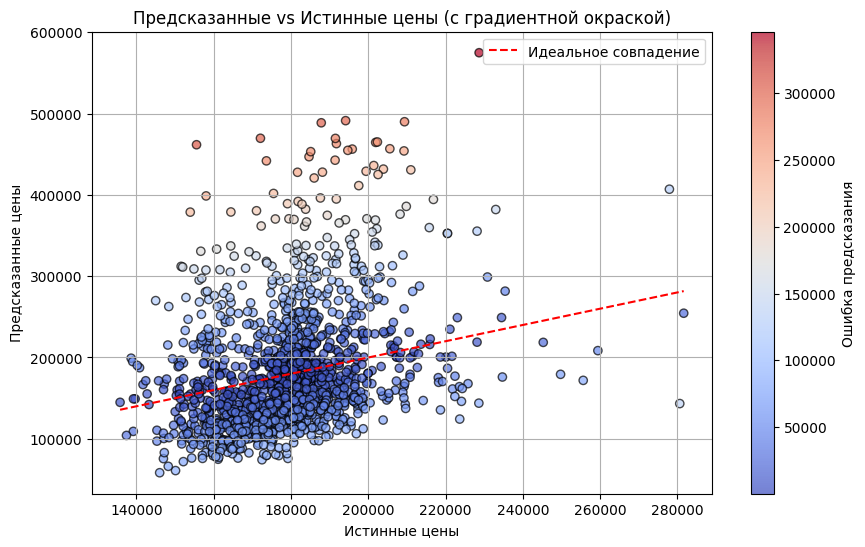

In [ ]:
errors = np.abs(y_predict_test - y_true_test_price)  

plt.figure(figsize=(10, 6))
plt.scatter(y_true_test_price, y_predict_test, c=errors, cmap='coolwarm', alpha=0.7, edgecolors='k')
plt.colorbar(label='Ошибка предсказания')
plt.plot([min(y_true_test_price), max(y_true_test_price)], 
         [min(y_true_test_price), max(y_true_test_price)], 
         color='red', linestyle='--', label='Идеальное совпадение')
plt.xlabel('Истинные цены')
plt.ylabel('Предсказанные цены')
plt.title('Предсказанные vs Истинные цены (с градиентной окраской)')
plt.legend()
plt.grid()
plt.show()


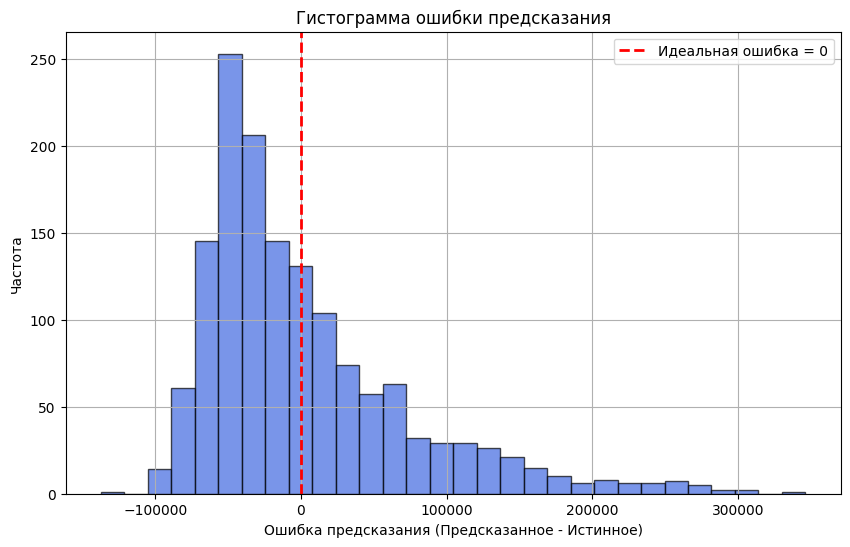

In [190]:
errors = y_predict_test - y_true_test_price  

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, color='royalblue', edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Идеальная ошибка = 0')
plt.xlabel('Ошибка предсказания (Предсказанное - Истинное)')
plt.ylabel('Частота')
plt.title('Гистограмма ошибки предсказания')
plt.legend()
plt.grid()
plt.show()

Модель ошибается в среднем на 40-50 тысяч.

ПРИЧИНЫ ПЛОХОГО РЕЗУЛЬТАТА:

1. Недостаточно данных для обучения модели - были использованы только 80% данных
2. Данные плохо распределены и имеют выбросы - не были изучены достаточно хорошо
3. Недостаточно изучена взаимосвязь SalePrice с переменными - лучше надо было выбирать признаки 